In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report


In [11]:
df = pd.read_csv('datatab.csv')
df.head()
df.shape


(41, 2)

In [21]:
X_train,x_test, y_train,y_test = train_test_split(df[['Blood value']],df[['Diseased']],test_size=0.45,random_state=42)


In [22]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [23]:
y_pred = clf.predict(x_test)
y_pred

array(['no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no'],
      dtype=object)

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[6, 3],
       [5, 5]])

Text(0.5, 1.0, 'Confuision Matrix Heatmap')

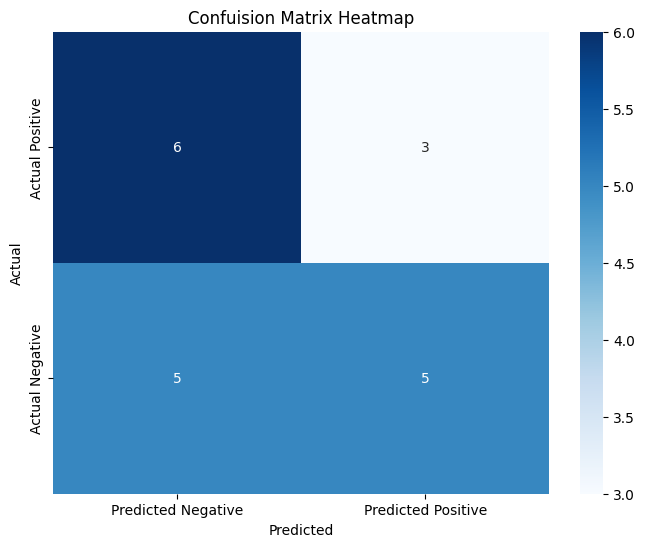

In [29]:
pt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',xticklabels=['Predicted Negative','Predicted Positive'],
            yticklabels=['Actual Positive','Actual Negative'])
pt.xlabel('Predicted')
pt.ylabel('Actual')
pt.title("Confuision Matrix Heatmap")

In [34]:
# Split the confuisionn matrix into TP, FP, FN, TN
tn,fp,fn,tp = cm.ravel()
print(f"True Negative (TP):{tn} ")
print(f"False Positive (TP):{fp} ")
print(f"False Negative (TP):{fn} ")
print(f"True Positive (TP):{tp} ")

True Negative (TP):6 
False Positive (TP):3 
False Negative (TP):5 
True Positive (TP):5 


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.55      0.67      0.60         9
         yes       0.62      0.50      0.56        10

    accuracy                           0.58        19
   macro avg       0.59      0.58      0.58        19
weighted avg       0.59      0.58      0.58        19

